# ECS7020P mini-project submission - Advanced Solution



# 1 Author


**Student Name**: Damith Chamalke Senadeera

**Student ID**: 220021133



# 2 Problem formulation

Here we try to find a machine learning model to correctly predict the gender of the person who hums a song. If we can identify the gender of a person by analysing hums , this can be applied in gender based voice recognition tasks.


Usually , the male and femal voice is differentiated by the human structure of the male and female vocal cords (https://simple.wikipedia.org/wiki/Vocal_cords). In general female voice has a higher pitch compared to male voice. Therefore for this task we explicitly use only hums, because for humming human vocal cords are generally used while for whistling in general the human vocal cords are not used.

In the meta data of the MLEnd Hums and Whistles data set we have the gender recorded for the IDs. Out of the 275 IDs, we have the gender recorded for 187 IDs (68% of the total IDs). Since it is a resonable amount of IDs we planned to extract the hum audio recordings relevant to those IDs where the gender has been recorded in order to train the machine learning models.

# 3 Machine Learning pipeline

First we extract the IDs from the metadata records where the gender has been reocrded and then as the input we filter the hum audio recordings related to those extracted IDs. Then we'll pre-process those data to extract the label of male vs female and take a look at the distribution of data and augment the data to make each class label have almost similar amount of data.  

Then we'll pre-process them to obtain the features such as the Power, Pitch, etc and label them accordingly finally creating training and validation sets.
 
Afterwards we'll train few machine learning models with these training data and evaluate the accuracies of the predicted gender labels with the help of the validation data set.

# 4 Transformation stage

First we will download the full data set recordings to google drive and mount the drive with our colab notebook along with the meta data csv file.

## 4.1 Cleaning the Downloaded Data

First we will extract the IDs where male or femal label is present from meta data and form 2 lists of IDs each for male and female.

Next we will extract the hum audio recordings for those 2 ID lists by splitting the audio file name and comparing the ID found in the audio file and also checking if the word "hum" is present in the file name itself. If those 2 criteria are matched we will label the audio files either male or female accordingly. Then we checked how many hum audio recordings are there for each label male and female. 

|Label |No. of hum recordings |
| --- | --- |
| Female | 611 | 
| Male | 1019 |


Since we noticed that femal audio recordings counnt only to about 37% of the total recordings, we decided to augment the data for Female label to produce more recording to make the data balanced for each class.

## 4.2 Data Augmentation

To augment the data for Female class label we used the python library nlpaug (https://github.com/makcedward/nlpaug). First we randomly selected 400 unique audio recordings under the female label and then we produced one augmented data for each of these original data adding random noise. We were careful not to augment data with pitch or the frequency of the audio file as we relized those factors may be crucial in discriminating female vocie vs male voice. Therefor we just added some random noise to those selected audio files to create 400 new data points for the female class.

After augmenting data, the amount of data for each class label was as follows

|Label |New no. of hum recordings |
| --- | --- |
| Female | 1011 | 
| Male | 1019 |

## 4.3 Feature Extraction

Since a raw audio signal is composed of thousands of dimensions in the predictor space, we will extract few features from our signal as predictors mainly being the Power, Pitch, Root Mean Square Energy which is an indicator of loudness, Zero Crossing Rate which is the number of times the audio wave crosses the horizontal time axis and also we thought of adding the highest pitch recorded in the audio file in the voiced region because it's known that female voices are high pitched compared to male voices, so we thought the highest pitch recorded might help in discriminating between the male and female voice. The following features are extracted from our raw audio signal files.


1.   Power.
2.   Pitch mean.
3.   Pitch standard deviation.
4.   Root Mean Square Energy mean 
5.   Root Mean Square Energy standard deviation
6.   Zero-Crossing Rate mean
7.   Zero-Crossing Rate standard deviation
8.   Highest voiced pitch recorded
9.   Fraction of voiced region.

The importance of these features is that we think these features will be good enough to discriminate between the 2 catagories of data we have.




# 5 Modelling

We are using 4 models to train and test with our data,

1.    Support Vector Classifier
 - Original SVM model is a linear classifier which is known as maximum margin classifier. SVM is used in supervised data to create a hyperplane that represents the largest separation (which is the margin) between two classes. In 1992, Bernhard Boser, Isabelle Guyon and Vapnik suggested another option to create non-linear classifiers by applying the kernel trick  to the maximum-margin hyperplanes. The method works by transforming the original space X into a new transformed space V and then the linear SVM classifier is fitted into this new transformed space. While the classifier is linear on the new space V, it may not be linear on the original space X. In addition, the effectiveness of SVM depends kernel's parameters and soft margin parameter C. 

2.    Random Forest Classifer 
 - Random forests is a class of ensemble models specifically designed for decision tree classifiers. A random forest grows many trees within itself. Each tree inside a random forest is generated based on a random subset of attributes. The final result on classifying a new instance (i.e. giving a class label to an unclassified instance) is achieved via majority voting. In this majority voting process, forest chooses the classification result having the most votes (over all the trees in the forest).

3.    K-Nearest Neighbour Classifier
 - The K-Nearest Neighbors algorithm is a classification technique based on similarity. The term K is known as the number of nearest neighbors. In K nearest neighbours, new samples are assigned the label of the closest (most similar) K training samples. Therefore, Boundaries are not defined although we can obtain them if necessary. One point to note about this algorithm is that the whole training dataset needs to be memorised. That’s why sometimes we say NN is an instance-based method or a lazy learning method.

4.    Majority Voting Ensemble Classifier
 - We will take the best 3 models out of the above 3 classfiers and create a majority voting ensembel model with 3 of the above models to see if we can improve the accuracy.



We decided to use these classification ML models because we have 2030 data points with 9 extracted features for each data point. So we will try few different combinations of hyper parameters in each of these models to get a good validation accuracy.

We will only report the models with the hyper-parameters for which we got the best results.

# 6 Methodology

After we clean and augment the data set next we extract the features from data set and perform the training and validation of our selected ML models, where we try to train our ML models with few different combinations of hyper-parameters.

We will divide the data set in to train and validate sets in percentages of 80% and 20% respectively. We will train the model using the extracted 9 features as our predictors and then validate the accuracy using the validation data set.

We will use accuracy of classification prediction as our main performance metric since the 2 classes have almost equal training and validation data which will be shown in the next section. Also, we will look into the precision, recall and F-1 Scores for each class in each model to see if the learning happens well over both the class labels and the general accuracy is not only attributed to learning of just one class label.

# 7 Dataset

The dataset that we are going to use is a subset of the MLEnd Hums and Whistles dataset with only hums where the ID of the audio file has been tagged Male or Female.

We have 3694 audio files altogether with 123 IDs for male label and 64 IDs for female label.

When we extracted the hum recordings for each label, we found that for male label there are 1019 files and for female label there are only 611 files. 

Therefore we augmented the data for female voice label by adding random noise for randomly selected 400 files out of the female label to avoid the class imbalance problem.

After data augmentation we got 1019 files for the male label and 1011 files for the female label.

When we divided the data into training and validation sets in 80:20 ratio , for trianing we had 1624 data points and for validation we had 406 data points.

Find below the pre processing and the plots for data distribution in total data set before and after augmentation, training data set and vlaidation data set.

In [50]:
!pip install nlpaug

In [51]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report

import librosa.display as librosa_display
import soundfile as sf
import nlpaug
import nlpaug.augmenter.audio as naa
import random


drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Note:

We created a folder named advancedData inside the folder MLEndHW to extract the downloaded data.

In [52]:
path = '/content/drive/MyDrive/Data/MLEndHW'
os.listdir(path)

['sample',
 'basicData',
 'MLEndHW_StarWars2.zip',
 'MLEndHW_StarWars1.zip',
 'MLEndHW_Potter2.zip',
 'MLEndHW_Potter1.zip',
 'MLEndHW_Showman2.zip',
 'MLEndHW_Showman1.zip',
 'MLEndHW_Rain2.zip',
 'MLEndHW_Rain1.zip',
 'MLEndHW_Panther2.zip',
 'MLEndHW_Frozen1.zip',
 'MLEndHW_Hakuna1.zip',
 'MLEndHW_Frozen2.zip',
 'MLEndHW_Hakuna2.zip',
 'MLEndHW_Mamma1.zip',
 'MLEndHW_Mamma2.zip',
 'MLEndHW_Panther1.zip',
 'MLEndHWD_Demographics_Miniproject.csv',
 'advancedData']

In [2]:
#unzip all the downloaded data
directory_to_extract_to = '/content/drive/MyDrive/Data/MLEndHW/advancedData/'

zip_path = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_Potter1.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

zip_path = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_Potter2.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

zip_path = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_StarWars1.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

zip_path = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_StarWars2.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

zip_path = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_Frozen1.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

zip_path = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_Frozen2.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

zip_path = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_Mamma1.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

zip_path = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_Mamma2.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

zip_path = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_Hakuna1.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

zip_path = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_Hakuna2.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

zip_path = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_Panther1.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

zip_path = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_Panther2.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

zip_path = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_Showman1.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

zip_path = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_Showman2.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

zip_path = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_Rain1.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

zip_path = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_Rain2.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [53]:
#checking how many files have been extracted
sample_path = '/content/drive/MyDrive/Data/MLEndHW/advancedData/*.wav'
files = glob.glob(sample_path)
len(files)

3694

In [54]:
#checking the file names of the 1st 20 files 
for file in files[:20]:
  print(file.split('/')[-1])

S127_hum_3_Showman.wav
S127_hum_4_Showman.wav
S128_hum_3_Showman.wav
S128_hum_4_Showman.wav
S129_hum_1_Showman.wav
S129_whistle_2_Showman.wav
S130_hum_2_Showman.wav.wav
S130_whistle_2_Showman.wav.wav
S131_hum_1_Showman.wav
S131_whistle_2_Showman.wav
S132_hum_1_Showman.wav
S132_whistle_2_Showman.wav
S133_hum_1_showman.wav
S133_whistle_2_showman.wav
S134_hum_1_[Showman].wav
S134_hum_2_[Showman].wav
S135_hum_1_Showman.wav
S135_whistle_2_Showman.wav
S136_hum_3_Showman.wav
S136_hum_4_Showman.wav


In [55]:
#load the demographic meta data for audio recordings
df_demog = pd.read_csv('/content/drive/MyDrive/Data/MLEndHW/MLEndHWD_Demographics_Miniproject.csv')

In [57]:
#demographic meta data
df_demog

,ID,Language1,Language2,Age,Nationality,Coordinates,Gender
0,S76,Hindi,English,20-24,Indian,"(40.60, -122.40)",Female
1,S217,NaN,NaN,NaN,NaN,NaN,Female
2,S221,Malayalam,Hindi,25-29,Indian,"(11.8745, 75.3704)",Female
3,S173,Akan,English,50-59,Ghanaian,"(5.6037, -0.1870)",Male
4,S115,Hindi,English,20-24,Indian,"(28.7041, 77.1025)",Male
...,...,...,...,...,...,...,...
270,S243,NaN,NaN,NaN,NaN,NaN,NaN
271,S225,NaN,NaN,NaN,NaN,NaN,NaN
272,S248,NaN,NaN,NaN,NaN,NaN,NaN
273,S244,English,Hindi,25-29,Indian,"(51.52, -0.04)",Female


In [58]:
#counting male and female IDs
male_id_list = df_demog[df_demog['Gender']=='Male']['ID'].tolist()
female_id_list = df_demog[df_demog['Gender']=='Female']['ID'].tolist()

len(male_id_list), len(female_id_list)

(123, 64)

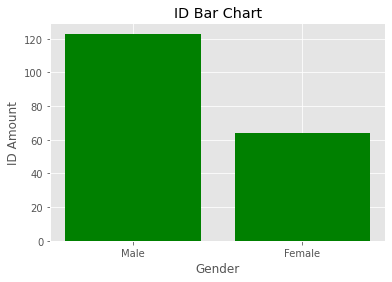

In [59]:
plt.style.use('ggplot')

x = ['Male', 'Female']
y = [123, 64]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, y, color='green')
plt.xlabel("Gender")
plt.ylabel("ID Amount")
plt.title("ID Bar Chart")

plt.xticks(x_pos, x)

plt.show()

In [62]:
#casefolding the IDs to lower case
temp1 = (map(lambda x: x.lower(), male_id_list))
male_id_list = list(temp1)

temp1 = (map(lambda x: x.lower(), female_id_list))
female_id_list = list(temp1)

In [63]:
#Extracting the hum audio files for female vs male lebels, labeling the data files accordingly
advanced_table = []
new_files = []
for file in files:
    file_name = None
    file_name = file.split('/')[-1]
    #print(file_name)
    participant_ID = None
    participant_ID = file.split('/')[-1].split('_')[0]
    #print(participant_ID)
    interpretation_type = None
    interpretation_type = file.split('/')[-1].split('_')[1]
    #print(interpretation_type)
    
    if participant_ID and interpretation_type :
        if participant_ID.lower() in male_id_list and interpretation_type.lower() == "hum" :
            interpret = "Hum"
            gender = "Male"
        elif participant_ID.lower() in female_id_list and interpretation_type.lower() == "hum" :
            interpret = "Hum"
            gender = "Female"
        else:
            continue
            
    else:
        continue
               
    advanced_table.append([file_name, interpret, gender])  
    new_files.append(file)
    
advanced_table[:20] 

[['S127_hum_3_Showman.wav', 'Hum', 'Male'],
 ['S127_hum_4_Showman.wav', 'Hum', 'Male'],
 ['S128_hum_3_Showman.wav', 'Hum', 'Male'],
 ['S128_hum_4_Showman.wav', 'Hum', 'Male'],
 ['S129_hum_1_Showman.wav', 'Hum', 'Male'],
 ['S132_hum_1_Showman.wav', 'Hum', 'Male'],
 ['S133_hum_1_showman.wav', 'Hum', 'Male'],
 ['S137_hum_3_Showman.wav', 'Hum', 'Male'],
 ['S137_hum_4_Showman.wav', 'Hum', 'Male'],
 ['S140_hum_1_Showman.wav', 'Hum', 'Male'],
 ['S142_hum_1_Showman.wav', 'Hum', 'Male'],
 ['S145_hum_1_[Showman].wav', 'Hum', 'Male'],
 ['S145_hum_2_[Showman].wav', 'Hum', 'Male'],
 ['S146_hum_1_(Showman).wav', 'Hum', 'Female'],
 ['S146_hum_2_(Showman).wav', 'Hum', 'Female'],
 ['S147_hum_1_showman.wav', 'Hum', 'Male'],
 ['S148_hum_1_Showman.wav', 'Hum', 'Female'],
 ['S149_hum_3_Showman.wav', 'Hum', 'Female'],
 ['S149_hum_4_Showman.wav', 'Hum', 'Female'],
 ['S150_hum_1_Showman.wav', 'Hum', 'Male']]

In [65]:
#counting hum samples for male and female labels
fm_cnt = 0
ml_cnt = 0

for each in advanced_table :

  if each[2] == "Male" :
    ml_cnt += 1
  elif each[2] == "Female" :
    fm_cnt += 1

print("Hum samples for male labels = ",ml_cnt,"\nHum samples for female labels = " ,fm_cnt)

Hum samples for male labels =  1019 
Hum samples for female labels =  611


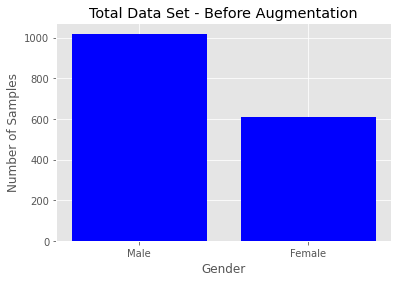

In [66]:
plt.style.use('ggplot')

x = ['Male', 'Female']
y = [1019, 611]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, y, color='blue')
plt.xlabel("Gender")
plt.ylabel("Number of Samples")
plt.title("Total Data Set - Before Augmentation")

plt.xticks(x_pos, x)

plt.show()

In [67]:
#colelcting the paths of female hum recordings
female_file_paths = []
for file_path, file_info in zip(new_files, advanced_table):
    
    if file_info[2] == "Female":
        female_file_paths.append(file_path)

len(female_file_paths)

611

In [68]:
#selecting random 400 female hum files to be augmented
random.seed(12456)
indicies = random.sample(range(len(female_file_paths)), 400)
new_list1 = [female_file_paths[i] for i in indicies]

In [69]:
#augmenting the selected 400 random female hum files to produce new 400 augmented samples with random noise
augmented_file_list = []
augmented_table = []
for i,each1 in enumerate(new_list1):
    data_1, sr_1 = librosa.load(each1)
    aug = naa.NoiseAug()
    augmented_data = aug.augment(data_1)
    file_path = '/'.join(each1.split('/')[:-1])+'/'+'augmented_'+str(i)+'.wav'
    augmented_file_list.append(file_path)
    augmented_table.append(['augmented_'+str(i)+'.wav', "Hum", "Female"])
    sf.write(file_path, augmented_data, sr_1)

In [70]:
#adding the augmented data into file list and the data list
advanced_table.extend(augmented_table)
new_files.extend(augmented_file_list)

In [71]:
#checking if the new files are added in the path list
len(new_files)

2030

In [72]:
#preparing the pandas dataframe for feature extraction
advanced_df = pd.DataFrame(advanced_table,columns=['file_id','interpret', 'gender']).set_index('file_id') 
advanced_df

,interpret,gender
file_id,,
S127_hum_3_Showman.wav,Hum,Male
S127_hum_4_Showman.wav,Hum,Male
S128_hum_3_Showman.wav,Hum,Male
S128_hum_4_Showman.wav,Hum,Male
S129_hum_1_Showman.wav,Hum,Male
...,...,...
augmented_395.wav,Hum,Female
augmented_396.wav,Hum,Female
augmented_397.wav,Hum,Female


In [73]:
#sample count with male label
advanced_df[advanced_df['gender']=='Male'].count()

interpret    1019
gender       1019
dtype: int64

In [74]:
#sample count with male label
advanced_df[advanced_df['gender']=='Female'].count()

interpret    1011
gender       1011
dtype: int64

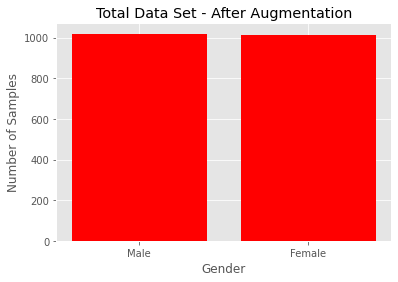

In [76]:
plt.style.use('ggplot')

x = ['Male', 'Female']
y = [1019, 1011]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, y, color='red')
plt.xlabel("Gender")
plt.ylabel("Number of Samples")
plt.title("Total Data Set - After Augmentation")

plt.xticks(x_pos, x)

plt.show()

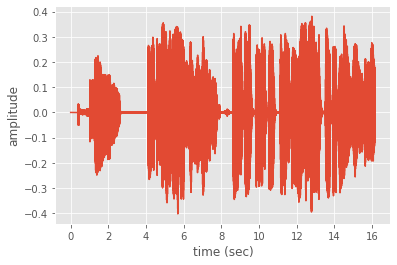

In [77]:
#example audio spectrogram
n=20
fs = None # Sampling frequency. If None, fs would be 22050
x, fs = librosa.load(new_files[n],sr=fs)
t = np.arange(len(x))/fs
plt.plot(t,x)
plt.xlabel('time (sec)')
plt.ylabel('amplitude')
plt.show()
display(ipd.Audio(new_files[n]))

In [78]:
#cheking the dimensionality of a raw adio signal
n=20
x, fs = librosa.load(new_files[n],sr=fs)
print('This audio signal has', len(x), 'samples')

This audio signal has 712347 samples


In [79]:
#extracting pitch from audio signal
def getPitch(x,fs,winLen=0.02):
    #winLen = 0.02 
    p = winLen*fs
    frame_length = int(2**int(p-1).bit_length())
    hop_length = frame_length//2
    f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=450, sr=fs,
                                                 frame_length=frame_length,hop_length=hop_length)
    return f0,voiced_flag

In [80]:
#extracting RMS Energy and Zero Crossing Rate from audio signal
def get_rms_zero(x,fs,winLen=0.02):
    #winLen = 0.02 
    p = winLen*fs
    frame_length = int(2**int(p-1).bit_length())
    hop_length = frame_length//2
    rms_energy = librosa.feature.rms(x, frame_length=frame_length, hop_length=hop_length)[0]
    zero_crs_rate = librosa.feature.zero_crossing_rate(x, frame_length=frame_length, hop_length=hop_length)[0]
    return rms_energy, zero_crs_rate

In [84]:
#extracting all the 9 features and preparing the corresponding predictors and label lists
def getXy(files,labels_file, scale_audio=False, onlySingleDigit=False):
    X,y =[],[]
    for file in tqdm(files):
        fileID = file.split('/')[-1].split('\\')[-1]
        
        yi = labels_file.loc[fileID]['gender']=='Male'

        fs = None # if None, fs would be 22050
        x, fs = librosa.load(file,sr=fs)
        if scale_audio: x = x/np.max(np.abs(x))
        f0, voiced_flag = getPitch(x,fs,winLen=0.02)
        rms_energy, zero_crs_rate = get_rms_zero(x,fs,winLen=0.02)

        #flitering frequency only for vocied time stamps
        vc_mat = np.matrix([f0,voiced_flag]).transpose()
        vc_mat = np.asarray(vc_mat)
        vc_array = vc_mat[vc_mat[:,1] != 0][:,0]


        power = np.sum(x**2)/len(x)
        pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0
        pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0
        rms_mean = np.nanmean(rms_energy) if np.mean(np.isnan(rms_energy))<1 else 0
        rms_std  = np.nanstd(rms_energy) if np.mean(np.isnan(rms_energy))<1 else 0
        zero_crs_mean = np.nanmean(zero_crs_rate) if np.mean(np.isnan(zero_crs_rate))<1 else 0
        zero_crs_std  = np.nanstd(zero_crs_rate) if np.mean(np.isnan(zero_crs_rate))<1 else 0
        max_vc_pitch = np.nanmax(vc_array) if not np.isnan(vc_array).all() else 0
        voiced_fr = np.mean(voiced_flag)

        xi = [power,pitch_mean,pitch_std,rms_mean,rms_std,zero_crs_mean,zero_crs_std,max_vc_pitch,voiced_fr]
        X.append(xi)
        y.append(yi)

    return np.array(X),np.array(y)

In [85]:
#generating the features
X,y = getXy(new_files, labels_file=advanced_df, scale_audio=True, onlySingleDigit=True)

100%|██████████| 2030/2030 [1:33:32<00:00,  2.76s/it]


In [86]:
#cheking the predictor and label list shapes
print('The shape of X is', X.shape) 
print('The shape of y is', y.shape)
print('The labels vector is', y)

The shape of X is (2030, 9)
The shape of y is (2030,)
The labels vector is [ True  True  True ... False False False]


In [87]:
#re-verifying number of data samples in each label
print(' The number of male recordings is ', np.count_nonzero(y))
print(' The number of female recordings is ', y.size - np.count_nonzero(y))

 The number of male recordings is  1019
 The number of female recordings is  1011


In [88]:
#checking the sizes of train and test split data sets
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=121)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1624, 9), (406, 9), (1624,), (406,))

In [89]:
#cheking the number of Female data points in validation set
y_val.size - np.count_nonzero(y_val)

208

In [90]:
#cheking the number of Male data points in validation set
np.count_nonzero(y_val)

198

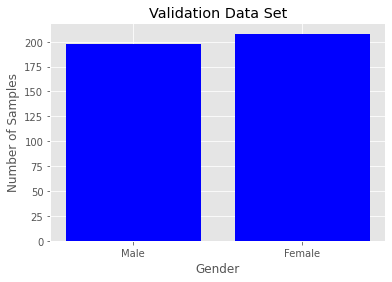

In [91]:
plt.style.use('ggplot')

x = ['Male', 'Female']
y = [198, 208]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, y, color='Blue')
plt.xlabel("Gender")
plt.ylabel("Number of Samples")
plt.title("Validation Data Set")

plt.xticks(x_pos, x)

plt.show()

In [92]:
#cheking the number of Female data points in training set
y_train.size - np.count_nonzero(y_train)

803

In [93]:
#cheking the number of Male data points in training set
np.count_nonzero(y_train)

821

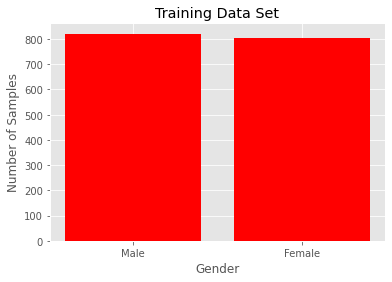

In [94]:
plt.style.use('ggplot')

x = ['Male', 'Female']
y = [821, 803]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, y, color='red')
plt.xlabel("Gender")
plt.ylabel("Number of Samples")
plt.title("Training Data Set")

plt.xticks(x_pos, x)

plt.show()

# 8 Results

Here we will train the 4 models we selected and report the best combination of hyper parameters with the accuracies obtained.

In [95]:
#SVM model training with different hyper parameters
model  = svm.SVC(C=2.5, kernel="rbf",gamma=0.0001,  class_weight="balanced", random_state=12456)
model.fit(X_train,y_train)

yt_p = model.predict(X_train)
yv_p = model.predict(X_val)

print('\nSVM Training Metrics\n')
print(classification_report(y_train,yt_p, target_names=['Female', 'Male'], digits=4))

print('\nSVM Validation Metrics\n')
print(classification_report(y_val,yv_p, target_names=['Female', 'Male'], digits=4))


SVM Training Metrics

              precision    recall  f1-score   support

      Female     0.9191    0.9340    0.9265       803
        Male     0.9344    0.9196    0.9269       821

    accuracy                         0.9267      1624
   macro avg     0.9268    0.9268    0.9267      1624
weighted avg     0.9268    0.9267    0.9267      1624


SVM Validation Metrics

              precision    recall  f1-score   support

      Female     0.9187    0.9231    0.9209       208
        Male     0.9188    0.9141    0.9165       198

    accuracy                         0.9187       406
   macro avg     0.9187    0.9186    0.9187       406
weighted avg     0.9187    0.9187    0.9187       406



In [96]:
#Random Forest model training with different hyper parameters
rf_clf=RandomForestClassifier(n_estimators=500, criterion='gini',  max_depth=10, class_weight="balanced",   random_state=12456)

rf_clf.fit(X_train,y_train)

yt_p = rf_clf.predict(X_train)
yv_p = rf_clf.predict(X_val)

print('\nRandom Forest Training Metrics\n')
print(classification_report(y_train,yt_p, target_names=['Female', 'Male'], digits=4))

print('\nRandom Forest Validation Metrics\n')
print(classification_report(y_val,yv_p, target_names=['Female', 'Male'], digits=4))


Random Forest Training Metrics

              precision    recall  f1-score   support

      Female     0.9781    1.0000    0.9889       803
        Male     1.0000    0.9781    0.9889       821

    accuracy                         0.9889      1624
   macro avg     0.9890    0.9890    0.9889      1624
weighted avg     0.9892    0.9889    0.9889      1624


Random Forest Validation Metrics

              precision    recall  f1-score   support

      Female     0.9206    0.9471    0.9336       208
        Male     0.9427    0.9141    0.9282       198

    accuracy                         0.9310       406
   macro avg     0.9316    0.9306    0.9309       406
weighted avg     0.9314    0.9310    0.9310       406



In [97]:
#K-Nearest Neighbour model training with different hyper parameters
neigh = KNeighborsClassifier(n_neighbors=8, weights='distance', metric='euclidean')
neigh.fit(X_train, y_train)

yt_p = neigh.predict(X_train)
yv_p = neigh.predict(X_val)

print('\nK-NN Training Metrics\n')
print(classification_report(y_train,yt_p, target_names=['Female', 'Male'], digits=4))

print('\nK-NN Validation Metrics\n')
print(classification_report(y_val,yv_p, target_names=['Female', 'Male'], digits=4))


K-NN Training Metrics

              precision    recall  f1-score   support

      Female     1.0000    1.0000    1.0000       803
        Male     1.0000    1.0000    1.0000       821

    accuracy                         1.0000      1624
   macro avg     1.0000    1.0000    1.0000      1624
weighted avg     1.0000    1.0000    1.0000      1624


K-NN Validation Metrics

              precision    recall  f1-score   support

      Female     0.9159    0.9423    0.9289       208
        Male     0.9375    0.9091    0.9231       198

    accuracy                         0.9261       406
   macro avg     0.9267    0.9257    0.9260       406
weighted avg     0.9264    0.9261    0.9261       406



In [98]:
#Ensemble model with the above 3 best models
estimators=[("svc",model), ("rf", rf_clf), ("knn", neigh)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, weights=[1,1,1],voting="hard")

#fit model to training data
ensemble.fit(X_train, y_train)

yt_p = ensemble.predict(X_train)
yv_p = ensemble.predict(X_val)

print('\nEnsemble Training Metrics\n')
print(classification_report(y_train,yt_p, target_names=['Female', 'Male'], digits=4))

print('\nEnsemble Validation Metrics\n')
print(classification_report(y_val,yv_p, target_names=['Female', 'Male'], digits=4))



Ensemble Training Metrics

              precision    recall  f1-score   support

      Female     0.9781    1.0000    0.9889       803
        Male     1.0000    0.9781    0.9889       821

    accuracy                         0.9889      1624
   macro avg     0.9890    0.9890    0.9889      1624
weighted avg     0.9892    0.9889    0.9889      1624


Ensemble Validation Metrics

              precision    recall  f1-score   support

      Female     0.9206    0.9471    0.9336       208
        Male     0.9427    0.9141    0.9282       198

    accuracy                         0.9310       406
   macro avg     0.9316    0.9306    0.9309       406
weighted avg     0.9314    0.9310    0.9310       406



Here is the Summary of the highest training and validation accuracies obtained for the 4 models we tried.

|Model |Training Accuracy | Validation Accuracy |
| --- | --- | --- |
| SVM | 92.67% | 91.87% |
| Random Forest | 98.89% | 93.10% |
| K-NN | 100% | 92.61% |
| Ensembel of above 3 best models | 98.89% | 93.10% |

Also in all the 4 models from precision, recall and F-1 measure for each class in each of the classifiers didn't have a drastic variability showing that training took place almost equally for both the classes and the general accuracy is not attributed just for one calss label.

# 9 Conclusions

- What we can see here is that the Random Forest and the Ensemble model gave the highest validation accuracy of 93.10% where K-NN model and SVM model also gave much closer validation accuracies. Despite giving the highest accuracy, ensemble model and the Random Forest model also seem to overfit slightly. It seems the K-NN model is also overfitting when comparing the training and validation accuracies.

- Since the validation accuracy of the ensemble model is exactly equal to the Random Forest model, it can be thought that the main classification is done based on the Random forest model inside the ensemble model.

- Just for 1000 data poitns each for the class labels, since it's giving a good accuracy of 93% it can be also thought that the features we selected are well represented in discriminating the male and female voices.

- To further improve this we could have done a grid search properly to find the best suitable hyper-parameters for each of the models along with implementing cros validation to see the real nature of the trianing and validation accuracies.

- Also we can explore what other features would help to classify an audio signal based on female and male vocal chracters and extract those additional features as well to see if those can discriminate the class labels better.

- We can additionally try to analyze in the future the effect of data augmentation for the training purpose as well. Just train the models without data augmentation and see how it affected for the increase or decrease of the accuracies as well as will it create a class imbalance problem if we don't augment the data.
